In [1]:
try:
    from PIL import Image
except ImportError:
    import Image
import pytesseract as ocr
import pandas as pd

%matplotlib inline  

In [2]:
options_psm = [f'--psm {i} --oem 1 ' for i in range(14)]
options_lang = [' -l kor', ' -l kor+eng']

psm_desc = [
    'Orientation and script detection (OSD) only.',
    'Automatic page segmentation with OSD.',
    'Automatic page segmentation, but no OSD, or OCR.',
    'Fully automatic page segmentation, but no OSD. (Default)',
    'Assume a single column of text of variable sizes.',
    'Assume a single uniform block of vertically aligned text.',
    'Assume a single uniform block of text.',
    'Treat the image as a single text line.',
    'Treat the image as a single word.',
    'Treat the image as a single word in a circle.',
    'Treat the image as a single character.',
    'Sparse text. Find as much text as possible in no particular order.',
    'Sparse text with OSD.',
    'Raw line. Treat the image as a single text line,bypassing hacks that are Tesseract-specific.'    
]

In [3]:
ocr.pytesseract.tesseract_cmd = r"C:\Program Files (x86)\Tesseract-OCR\tesseract.exe"

In [4]:
'''
--oem 1           
  0    Legacy engine only.
  1    Neural nets LSTM engine only.
  2    Legacy + LSTM engines.
  3    Default, based on what is available.                        
'''

'\n--oem 1           \n  0    Legacy engine only.\n  1    Neural nets LSTM engine only.\n  2    Legacy + LSTM engines.\n  3    Default, based on what is available.                        \n'

In [5]:
def write_to_excel(df, output, sheet='Sheet1'):
    writer = pd.ExcelWriter(output)
    df.to_excel(writer, sheet)
    writer.save()

In [6]:
def simulate_var_opt(img, output):
    df = pd.DataFrame({'psm_desc': psm_desc, 'result' + options_lang[0]: np.nan, 'result' + options_lang[1]: np.nan}, index=range(14))

    for i, p in enumerate(options_psm):    
        for l in options_lang:
            try:
                print(p+l)
                df.loc[i, 'result' + l] = ocr.image_to_string(img, config=p+l)
            except FileNotFoundError:
                pass
    
    write_to_excel(df, output)

--psm 0 --oem 1  -l kor
--psm 0 --oem 1  -l kor+eng
--psm 1 --oem 1  -l kor
--psm 1 --oem 1  -l kor+eng
--psm 2 --oem 1  -l kor
--psm 2 --oem 1  -l kor+eng
--psm 3 --oem 1  -l kor
--psm 3 --oem 1  -l kor+eng
--psm 4 --oem 1  -l kor
--psm 4 --oem 1  -l kor+eng
--psm 5 --oem 1  -l kor
--psm 5 --oem 1  -l kor+eng
--psm 6 --oem 1  -l kor
--psm 6 --oem 1  -l kor+eng
--psm 7 --oem 1  -l kor
--psm 7 --oem 1  -l kor+eng
--psm 8 --oem 1  -l kor
--psm 8 --oem 1  -l kor+eng
--psm 9 --oem 1  -l kor
--psm 9 --oem 1  -l kor+eng
--psm 10 --oem 1  -l kor
--psm 10 --oem 1  -l kor+eng
--psm 11 --oem 1  -l kor
--psm 11 --oem 1  -l kor+eng
--psm 12 --oem 1  -l kor
--psm 12 --oem 1  -l kor+eng
--psm 13 --oem 1  -l kor
--psm 13 --oem 1  -l kor+eng


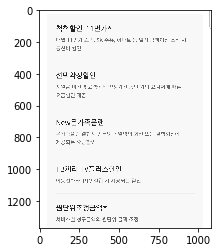

In [7]:
img = Image.open('./img_sample/bl2.jpg')
dc_img = img.crop((0,550,img.width,1920))
plt.imshow(dc_img)
simulate_var_opt(dc_img, './img_sample/dc.xlsx')

In [ ]:
img = Image.open('./img_sample/bl1.jpg')
guid_img = img.crop((0,700,img.width,1000))
plt.imshow(guid_img)
simulate_var_opt(guid_img, './img_sample/guid.xlsx')

In [ ]:
img = Image.open('./img_sample/bl3.jpg')
fee_img = img.crop((0,300,img.width,1800))
plt.imshow(fee_img)
simulate_var_opt(fee_img, './img_sample/fee.xlsx')